<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
 Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. 

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
        
1. To identify different segments in the existing customer, based on customer spending patterns as well as past interaction with the bank.
2. Using clustering algorithms,provide recommendations to the bank on how to better market to and service these customers.
3. Provide recommendations to marketing team to target new customers as well as upsell to existing customers.
4. Provide business recommendations to operations team to upgrade the service delivery model for better customer support services and faster customer query resolution.


<font color=darkcyan>
<font size =5>
Key Questions

<font color=black>
<font size =2.5>
    
1. Which variables should be used for clustering?
2. How many different groups/clusters of customers can be found from the data?
3. How do the different clusters vary?
4. How to use PCA to retain the components which explain upto 85-90% variance?
5. How to perform clustering using the components obtained from PCA?

<font color=darkcyan>
<font size =5>
1.1 Installing and Loading all required packages and libraries

In [462]:
# Installing yellowbrick package
#!pip install imblearn
#!pip install yellowbrick

In [463]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


# To use statistical functions
import scipy.stats as stats

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [464]:
#Import the data set
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [465]:
# copying data to another variable to avoid any changes to original data
card = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [466]:
card.head(10)# Read top 10 values of the data set

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [467]:
card.tail(10)# Read bottom 10 values of the data set

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<font color = 'green'>
<font size =1 >
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Data Set

In [468]:
card.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset consists of the above 7 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [469]:
card.shape #shape of dataset

(660, 7)

<font color = 'green'>
<font size =1 >
# Observations : 
We have 660 rows and 7 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [470]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. There are no missing values in the given data set.
2. All the columns are of integer values.
3. Sl_no is a redundant serial number, hence has no value for analysis and can be removed.

<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [471]:
card.isnull().values.any() # If there are any null values in data set

False

In [472]:
# Check for null values in the data each column
card.isnull().sum().sort_values(ascending=False)

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >
There are no missing or Nan values in the given data set.

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [473]:
# Detailed summary of the data set
card.describe(include="all")


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. `Customer Key` is a unique customer identification number and can be considered as category instead of numerical.
2. Data in `Avg_Credit_Limit` appears to be skewed.
3. `Total_Credit_Cards` , customers have a minimum of 1 to max of 10 credit cards.
4. Customer interactions with the bank via bank visit ranges from 1 to 5, online is 1 to 15 times, calls made are between 1 to 10.

<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing 'Customer Key" to categorical type

In [474]:
## Converting the data type 
card['Customer Key'] = card['Customer Key'].astype('category')
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sl_No                660 non-null    int64   
 1   Customer Key         660 non-null    category
 2   Avg_Credit_Limit     660 non-null    int64   
 3   Total_Credit_Cards   660 non-null    int64   
 4   Total_visits_bank    660 non-null    int64   
 5   Total_visits_online  660 non-null    int64   
 6   Total_calls_made     660 non-null    int64   
dtypes: category(1), int64(6)
memory usage: 57.5 KB


<font color = 'green'>
<font size =1 >
# Observations : 
'Customer Key' column is now a categorical variable instead of numeric.

<font color=darkorange>
<font size =4.5>
1.4.2 Removing redundant column "Sl_No"

In [475]:
# Drop Sl_No column
card.drop(["Sl_No"], axis=1, inplace=True)
card.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


<font color = 'green'>
<font size =1 >
# Observations : 
Sl_no column is dropped. Now we have 6 columns to evaluate.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking Unique value in each column

In [476]:
# Unique category in each coulmn
for i in card.columns:
    print(card[i].value_counts())
    print("*" * 50)

96929    2
47437    2
97935    2
50706    2
37252    2
        ..
68067    1
68040    1
68003    1
67911    1
11265    1
Name: Customer Key, Length: 655, dtype: int64
**************************************************
8000      35
6000      31
9000      28
13000     28
10000     26
19000     26
7000      24
11000     24
18000     23
14000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
38000      8
50000      8
56000      7
39000      7
68000      7
52000      6
37000      6
34000      6
30000      6
74000      6
47000      6
48000      6
41000      6
60000      5
29000      5
26000      5
65000      5
31000      5
54000      4
51000      4
59000      4
73000      4
71000      4
49000      4
69000      4
64000      4
66000      4
33000      4
28000      3
67000      3
62000      3
100000     3
72000      3
61000      3
58000      3
44000      3
45000      3
46000      3
57000      3
40000      3
163000     2
84000      2
27

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Few of the customers from `Customer Key` column are repeating customers, about 5 customer keys are repeated twice, these need to be evaluated for duplicate values.
2. `Avg_Credit_Limit` is too varied and can be binned for further analysis.
3. `Total_Credit_Cards` : The customers have overall 1 to 10 credit cards. Most customers have a total 4,6 or 7 credit cards.
4. `Total_visits_bank`: Customer visits to bank is in range of 0 to 5. Most customers visit the bank 2 times yearly.
5. `Total_visits_online`: Customer visits online is in range 0 to 15. Most customers online visit on bank sites is about 2 times yearly
6. `Total_calls_made`: Total customer calls made to the bank are in range 0 to 10. Most customers have made 4 calls yearly.

<font color=darkorange>
<font size =4.5>
1.4.4 Checking duplicate value in Customer Key column

In [477]:
gb_card = card.groupby('Customer Key').count()
print('There are',gb_card.loc[gb_card.Total_calls_made >=2].shape[1], 'duplicate entries for Customer Key')

for k in list(gb_card.loc[gb_card.Total_calls_made >=2].index):
    display(card.loc[card['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. The duplicate records for Customer Key don't match,
2. We can assume that a record was added to the database instead of updating an existing record, 
3. Also these could be joint accounts where the Customer Key is same but with different Sl_No.

<font color=darkcyan>
<font size =5>
1.5 Univariate Analysis

<font color=darkorange>
<font size =4.5>
1.5.1 Histogram of all the given columns

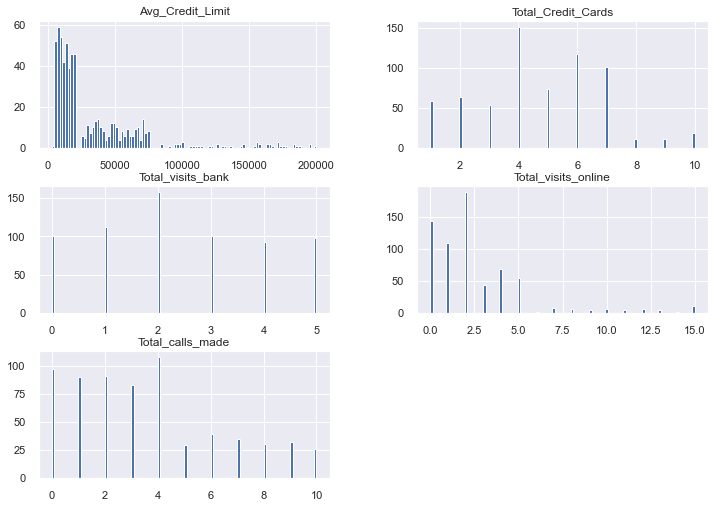

In [478]:
# Plotting a histogram of all numerical columns in the dataset
columns = list(card)# All columns in the data set
card[columns].hist(stacked=False, bins=100, figsize=(12,60), layout=(20,2)); # plot histogram

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1 >

1. `Avg_Credit_Limit` data looks skewed with multiple peaks.
3. `Total_Credit_Cards` : Maximum customers have 4 credit cards.
4. `Total_visits_bank`: Customer visits to bank is in range of 0 to 5. Most customers visit the bank 2 times yearly.
5. `Total_visits_online`: Right skewed data. Very less customers visit bank sites online more than 5 times yearly.
6. `Total_calls_made`:Most customers have made 4 or  less than 4 calls yearly.

<font color=darkorange>
<font size =4.5>
1.5.2 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [479]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
#  Writing a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.countplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=True, ax=ax_hist2,palette="winter"
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<font color=darkorange>
<font size =4.5>
1.5.2.1 Boxplot and Histogram of Avg_Credit_Limit

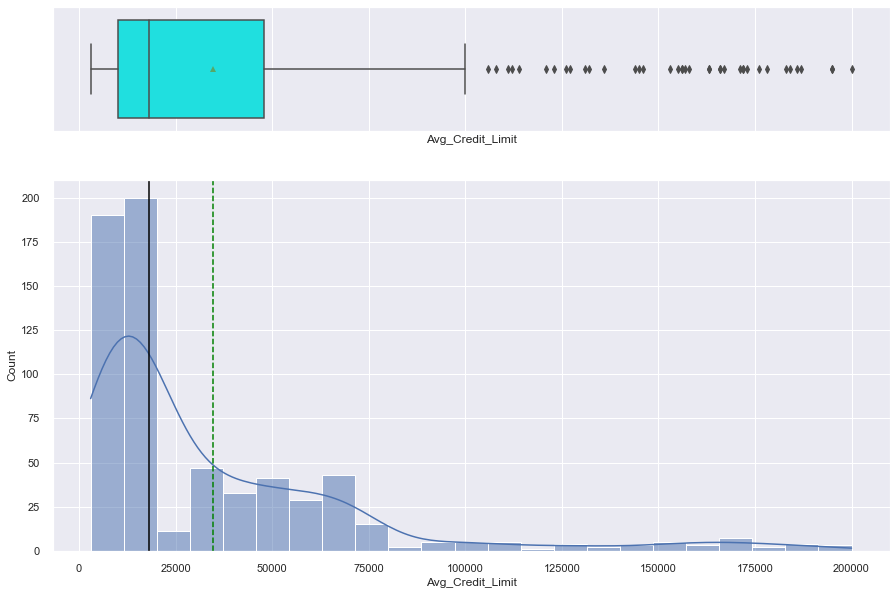

In [480]:
# Plotting Customer Age
histogram_boxplot(card['Avg_Credit_Limit'])

<font color=green>
<font size =1>
# Observations : 
    1) Too varied needs binning
    2) Max customers have less than 25k average credit limit.
    3) Right skewed data.
    4) Lot of outliers. But outliers cannot be treated as they contain valuable data of high average credit limit customers.

<font color=darkorange>
<font size =4.5>
1.5.2.2 Boxplot and Histogram of Total_Credit_Cards

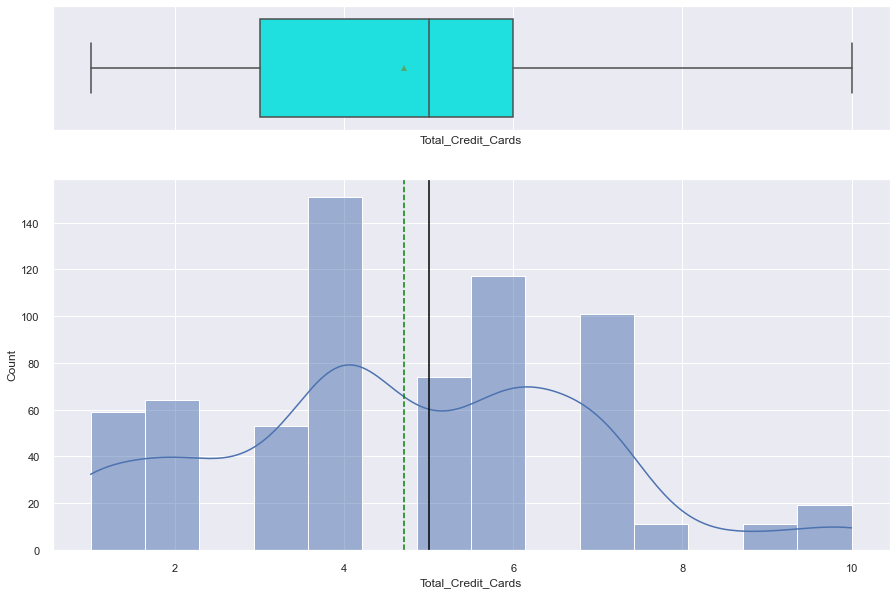

In [481]:
# Plotting Months_on_book
histogram_boxplot(card["Total_Credit_Cards"])

<font color=green>
<font size =1>
# Observations : 
    1) Almost normal distribution.
    2) No skew
    3) No outliers

<font color=darkorange>
<font size =4.5>
1.5.2.3 Boxplot and Histogram of Total_visits_bank

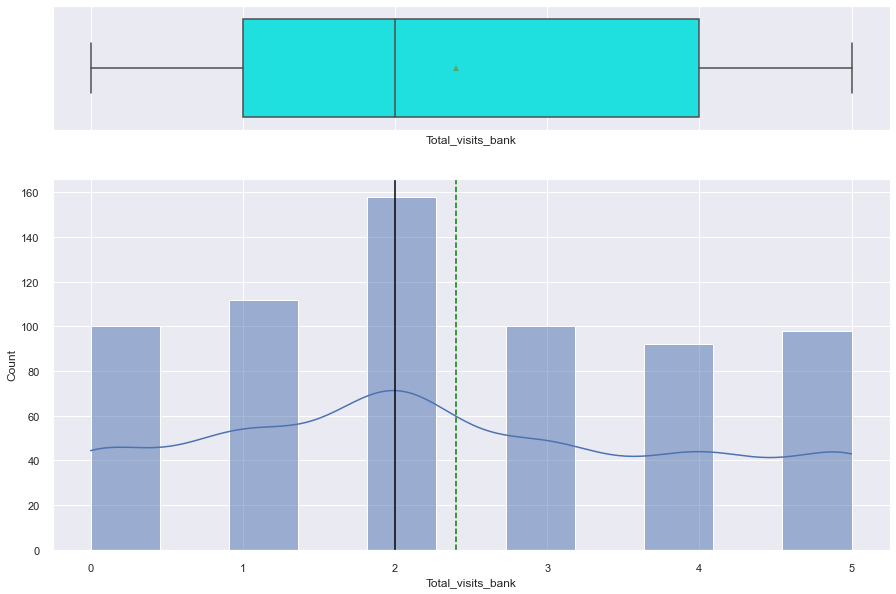

In [482]:
histogram_boxplot(card["Total_visits_bank"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) No skew
    2) No outliers.
    3) Customers have visited bank 0 to 5 times. Almost normal distribution of customers. 2 time visitors are slightly higher.

<font color=darkorange>
<font size =4.5>
1.5.2.4 Boxplot and Histogram of Total_visits_online

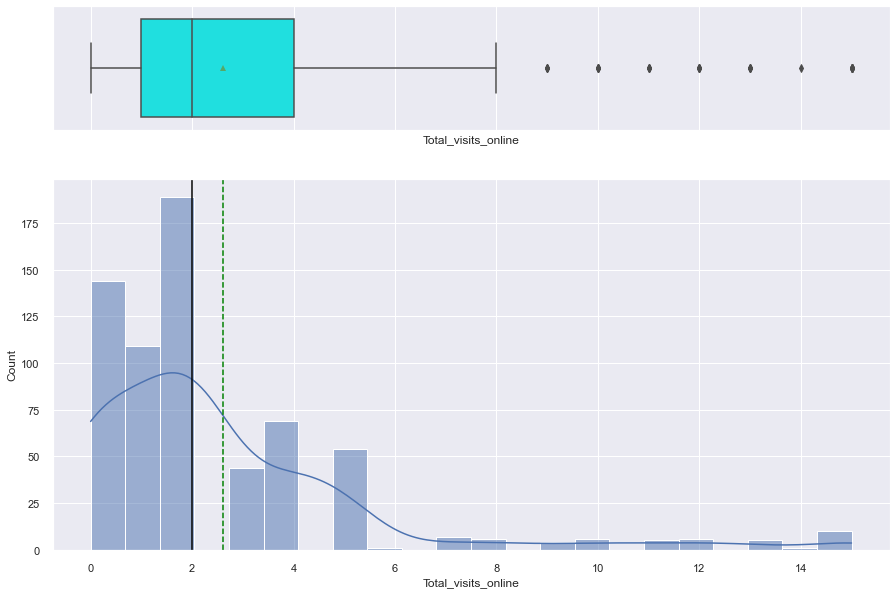

In [483]:
histogram_boxplot(card["Total_visits_online"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Right Skewed
    2) Few outliers.
    3) Maximum customers visit bank sites 0 to 2 times.

<font color=darkorange>
<font size =4.5>
1.5.2.5 Boxplot and Histogram of Total_calls_made

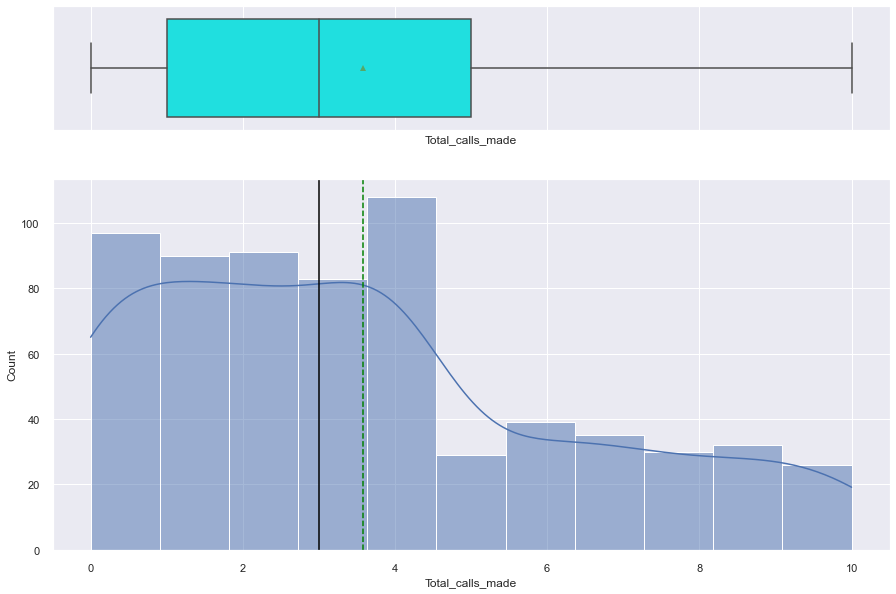

In [484]:
histogram_boxplot(card["Total_calls_made"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Slightly Right Skewed
    2) No outliers.
    3) Most customers have made less than 5 calls to bank yearly.

<font color=darkorange>
<font size =4.5>
1.5.3 Percentage analysis of each category.

In [485]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.5.3.1 Percentage by Total_Credit_Cards

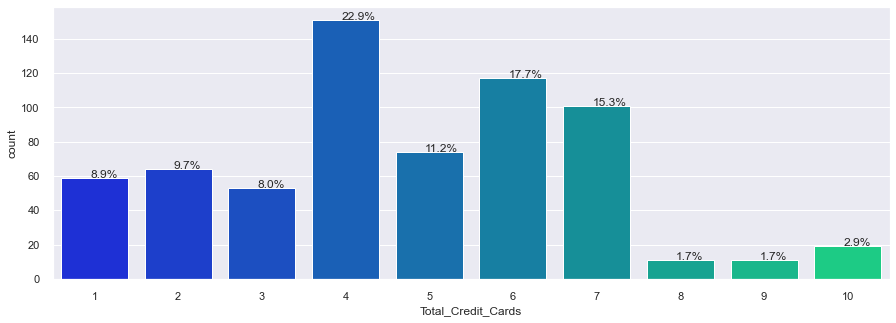

In [486]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    card["Total_Credit_Cards"],
    palette="winter",
    
)
perc_on_bar(ax, card["Total_Credit_Cards"])

<font color=green>
<font size = 1>
# Observations : 
Almost 65 % of customers have 4 to 7 credit cards. Less than 5 % of customers have 8 or more credit cards.


<font color=darkorange>
<font size =4.5>
1.5.3.2 Percentage by Total_visits_bank

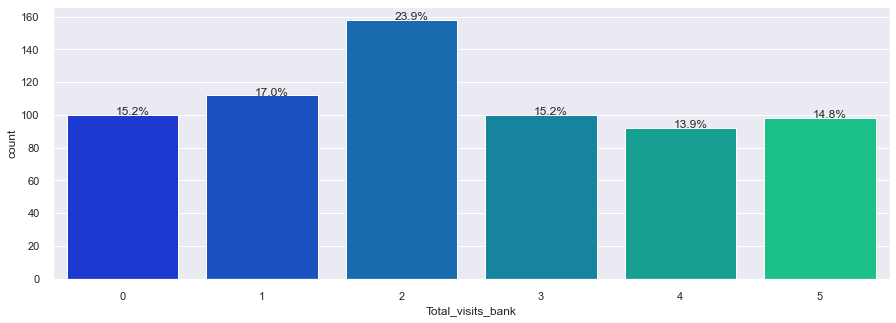

In [487]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    card["Total_visits_bank"],
    palette="winter",
    
)
perc_on_bar(ax, card["Total_visits_bank"])

<font color=green>
<font size = 1>
# Observations : 
Almost 15% of customers never visit the bank. More than 50%v of customers visit bank atleasr 1 to 3 times. 

<font color=darkorange>
<font size =4.5>
1.5.3.3 Percentage by Total_visits_online

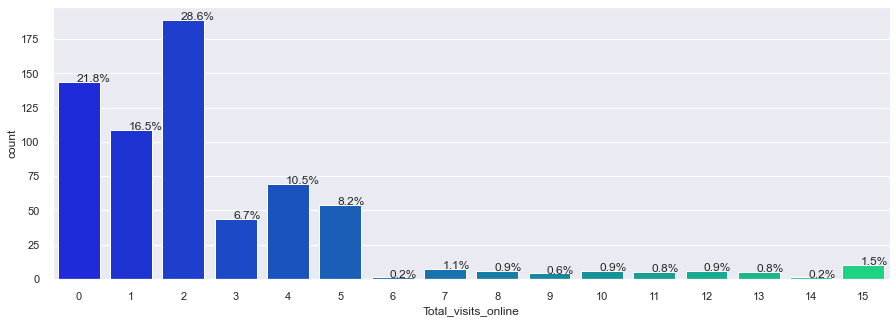

In [488]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    card["Total_visits_online"],
    palette="winter",
    
)
perc_on_bar(ax, card["Total_visits_online"])

<font color=green>
<font size = 1>
# Observations : 
Almost 70% of customers visit bank online atleast 1 to 5 times. @0% of customers never visit banks online.


<font color=darkorange>
<font size =4.5>
1.5.3.4 Percentage by Total_calls_made

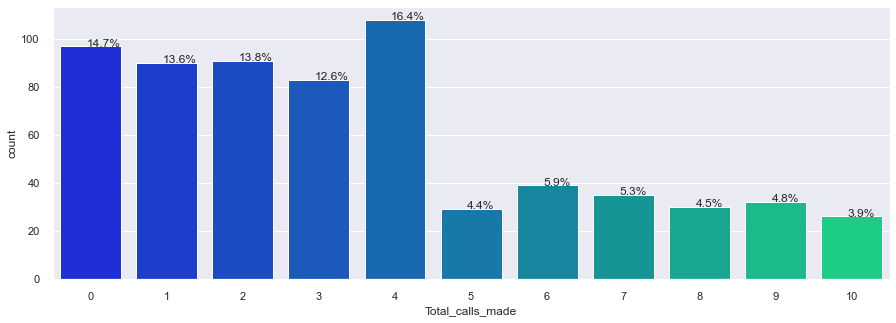

In [489]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    card["Total_calls_made"],
    palette="winter",
    
)
perc_on_bar(ax, card["Total_calls_made"])

<font color=green>
<font size = 1>
# Observations : 
Almost 15 % customers never call. Around 50 % of customers call bank atleast 1 to 4 times in a year.


<font color=darkcyan>
<font size =5>
1.6 Bivariate Analysis

In [490]:
card_bi = card.copy()

<font color=darkorange>
<font size =4.5>
1.6.1 Pair plots of all numerical data

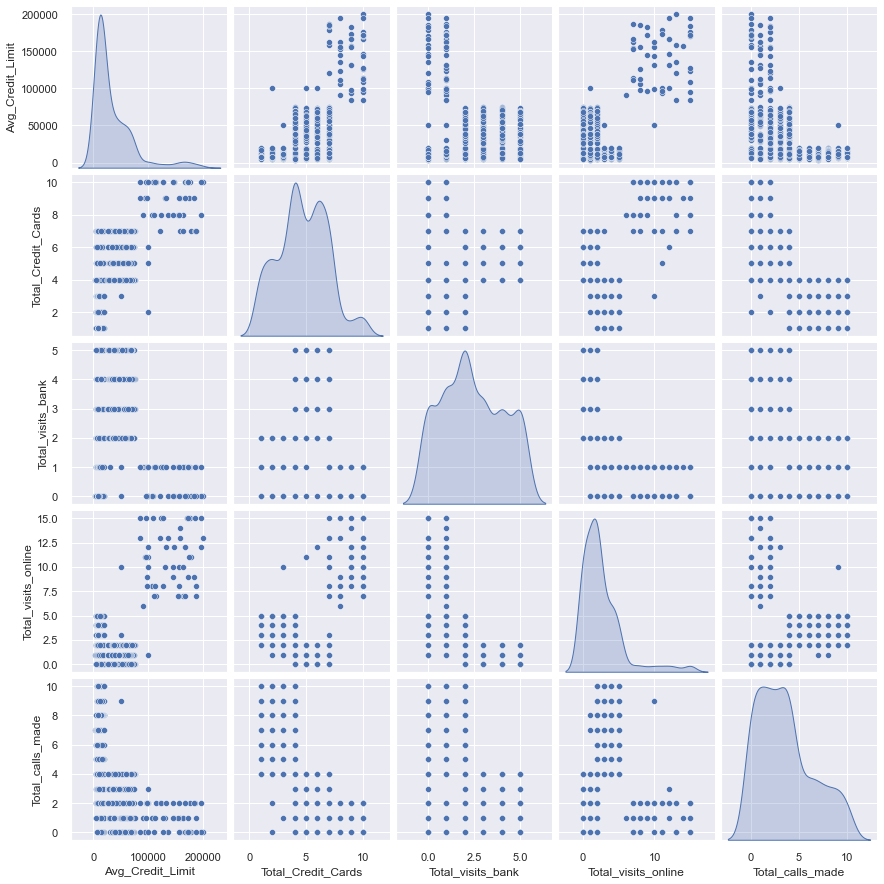

In [491]:
# Plotting pair plots between all numerical columns
sns.pairplot(card_bi, diag_kind="kde")
plt.show()

<font color=darkorange>
<font size =4.5>
1.6.2 Plotting a heat map

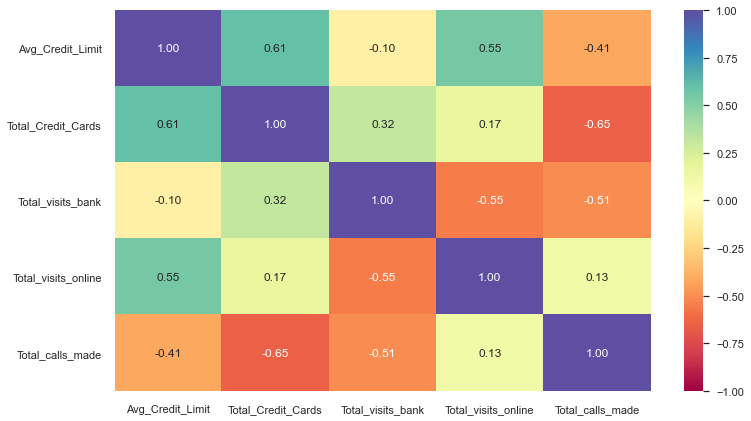

In [492]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    card_bi.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=green>
<font size =1>
# Observations 


<font color=darkorange>
<font size =4.5>
1.6.3 Plotting a Bar Plot Correlation between Total_Credit_Cards and all other parameters

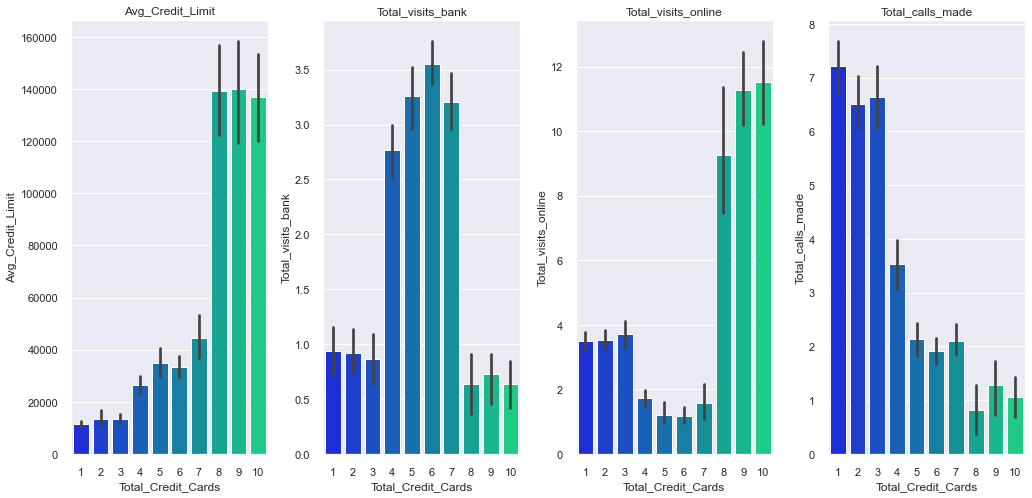

In [493]:
cols = card_bi[
    [
        'Avg_Credit_Limit',
       'Total_visits_bank',
        'Total_visits_online',
       'Total_calls_made' ]
].columns.tolist()
plt.figure(figsize=(18,20 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 5, i + 1)
    sns.barplot(card_bi["Total_Credit_Cards"], card_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Avg_Credit_Limit increases with increase in Total_Credit_Cards in customers.
2. Customers with 4-7 credit cards visit banks more as compared to those with less than 4 or more than 7 cards.
3. Customers with more than 8 credit cards visit online bank sites more than the rest.
4. Customers with 1 to 3 credit cards mode of contact with bank is preferrably calls.
5. If we divide customers into three groups customers preferring online, call or inperson communications with bank, then on the basis of customer total credit cards, people with low total cards, i.e., less than 3 prefer more of phone communication, those with moderate number of cards, i.e. 4-7 prefer visiting the bank in person and those with high number of cards , i.e, more than 8 prefer online communication.


<font color=darkorange>
<font size =4.5>
1.6.4 Plotting a Bar Plot Correlation between Total_calls_made and all other parameters

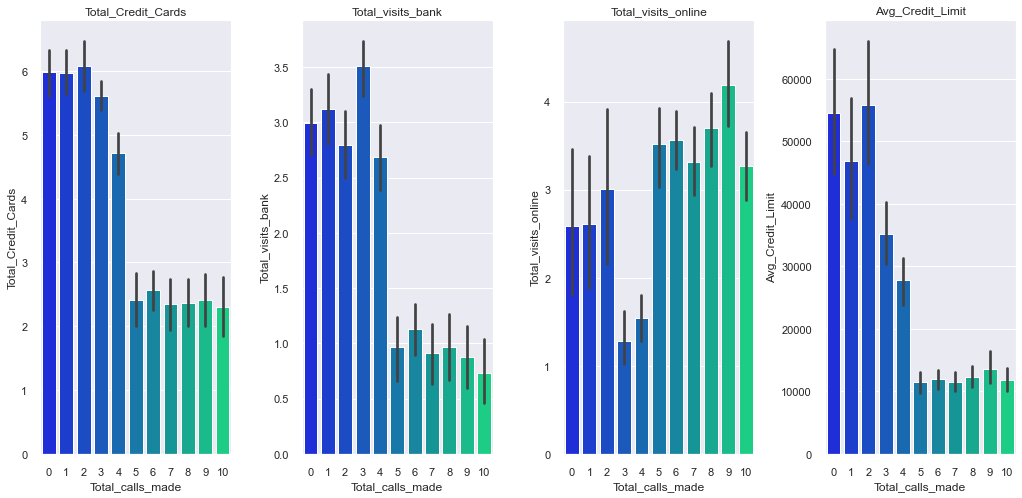

In [494]:
cols = card_bi[
    [
        'Total_Credit_Cards',
       'Total_visits_bank',
        'Total_visits_online',
       'Avg_Credit_Limit' ]
].columns.tolist()
plt.figure(figsize=(18,20 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 5, i + 1)
    sns.barplot(card_bi["Total_calls_made"], card_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Zero or lower calls made corresponds to more credit cards, more visits online,less visits online and higher average credit limit.
2. Customer who make more calls visit banks less, but have significantly hihger online presence.
3. But they have less credit cafrds in total and as a result lower average credit limit.
4. These customers can be targeted by marketing team to increase customer base.


<font color=darkorange>
<font size =4.5>
1.6.5 Plotting a Bar Plot Correlation between Total_visits_online and all other parameters

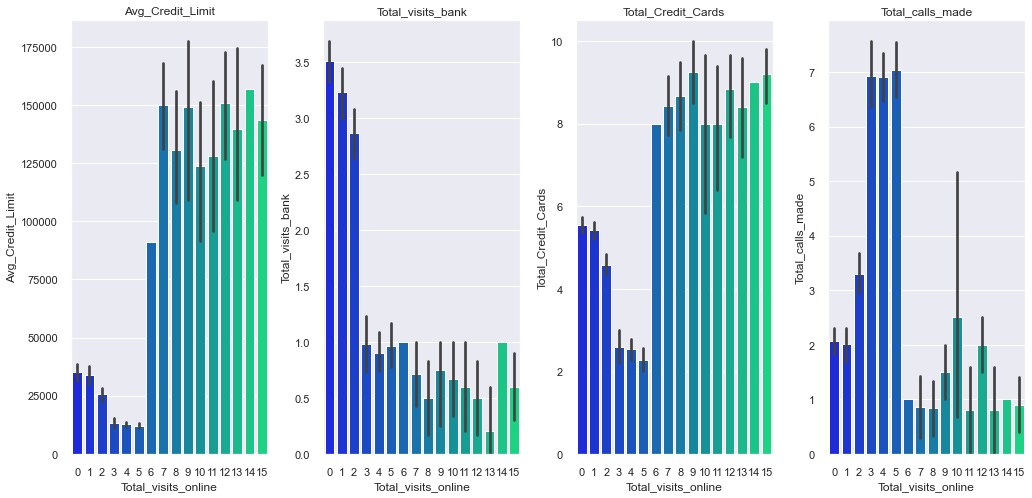

In [495]:
cols = card_bi[
    [
        'Avg_Credit_Limit',
       'Total_visits_bank',
        'Total_Credit_Cards',
       'Total_calls_made' ]
].columns.tolist()
plt.figure(figsize=(18,20 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 5, i + 1)
    sns.barplot(card_bi["Total_visits_online"], card_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Customers with zero or lower average credit limit tend to do less online banking according to our data.
2. Also the customers with low online presence tend to visit bank inperson more, as seen by our graphs.
3. Also we can clearly see that customers with more credit cards visit online sites more as compared to others.
 


<font color=darkorange>
<font size =4.5>
1.6.6 Plotting a Bar Plot Correlation between Total_visits_bank and all other parameters

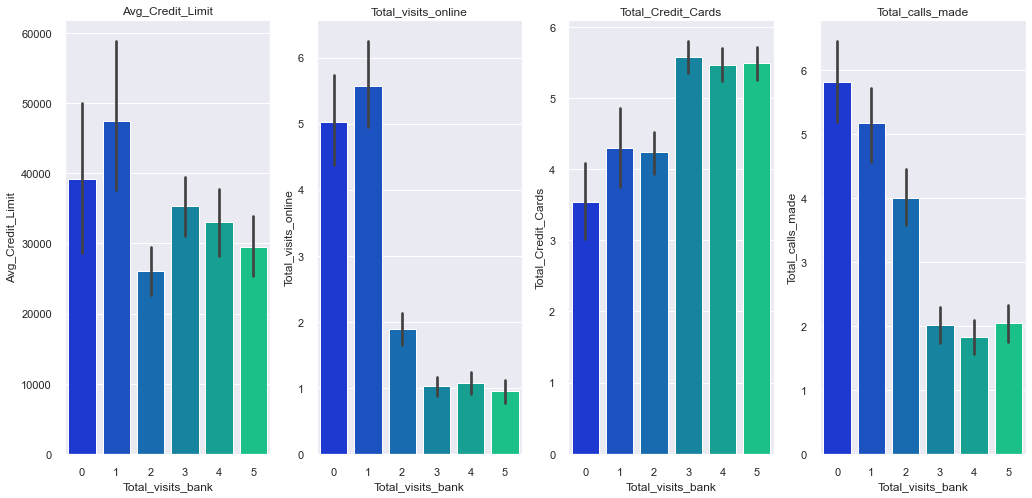

In [496]:
cols = card_bi[
    [
        'Avg_Credit_Limit',
       'Total_visits_online',
        'Total_Credit_Cards',
       'Total_calls_made' ]
].columns.tolist()
plt.figure(figsize=(18,20 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 5, i + 1)
    sns.barplot(card_bi["Total_visits_bank"], card_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Customers with zero or lower visit in bank have moderate average credit limit, but high online presence and higher calls.
2. Also these customers have less credit cards as compared to those with higher bank visits. This shows that in person banking increases the chance of more marketing , therby increasing credit card customer base.

<font color=darkcyan>
<font size =5>
1.7 Applying K-means clustering

In [497]:
# Making a copy of dataset
card_sc = card.copy()

In [498]:
# Making a list to separate numeric and categorical columns
num_col = card_sc.select_dtypes(include=np.number).columns.tolist()

<font color=darkorange>
<font size =4.5>
1.7.1 Scaling the data 

In [499]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = card_sc[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [500]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<font color = 'green'>
<font size =1 >
# Observations : Scaling the data set for normalization of dataset

<font color=darkorange>
<font size =4.5>
1.7.2 Apply K-means clustering

In [501]:
# Apply k-means clustering and print the average distortion for number clusters in range 1 to 9.
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)



Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9430345572895963
Number of Clusters: 7 	Average Distortion: 0.9095950026993534
Number of Clusters: 8 	Average Distortion: 0.886576514339759


In [502]:
# Determining the drop percentage
dict(zip(clusters,pd.Series(meanDistortions).pct_change()*100))

{1: nan,
 2: -27.393531458670072,
 3: -21.310541727930733,
 4: -8.742604890775818,
 5: -5.314518776839261,
 6: -4.818238718270839,
 7: -3.54595219568119,
 8: -2.5306304774414756}

<font color = 'green'>
<font size =1 >
# Observations : We can see that average distortion drops significantly from 1 to 2 and 2 to 23. Around 21 %. We will consider the second drop , hence the appropriate number of clusters appear to be 3 or 4. We will plot the elbow to curve to determine the appropriate value of k.

<font color=darkorange>
<font size =4.5>
1.7.3 Elbow curve

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

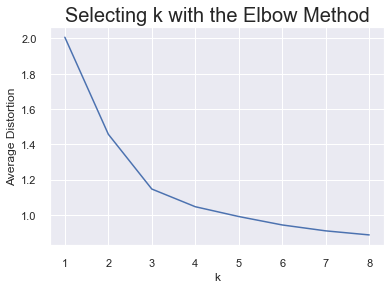

In [503]:
# Plotting the elbow curve
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

<font color = 'green'>
<font size =1 >
# Observations : The appropriate value of k from the elbow curve seems to be 3 or 4. We will check the silhouette scores to check the value of k.

<font color=darkorange>
<font size =4.5>
1.7.4 Silhouette scores

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.2560335721139671
For n_clusters = 7, silhouette score is 0.24809451597323307
For n_clusters = 8, silhouette score is 0.2260740921187178
For n_clusters = 9, silhouette score is 0.21902206210903344


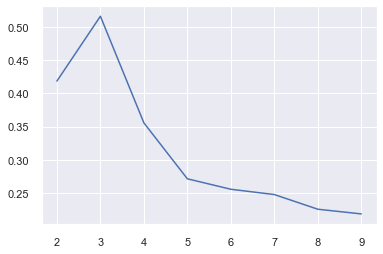

In [504]:
# PLotting the silhouette score.
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

<font color = 'green'>
<font size =1 >
# Observations : From the silhouette scores, it seems that 3 is a good value of k

<font color=darkorange>
<font size =4.5>
1.7.5 Find Optimal number of clusters from Silhouette scores

<font color = 'black'>
<font size =2 >
 ###  By assigning different vales of k , let's check Silhouette plot and try to find the optimal number of clusters with the silhouette coefficients. We will check for k value of 2, 3, 4, 5

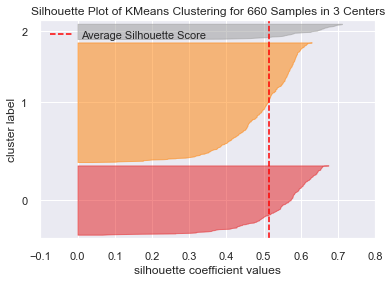

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [505]:
# finding optimal no. of clusters with silhouette coefficients with k= 3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

<font color = 'green'>
<font size =1 >
# Observations : From the silhouette plot for k = 3, the thickness of the silhouette plot the cluster size can be visualized. As we can see the clusters don't seem to be equally divided. Hence we will try other k values to find optimal number cluster with approximately equally divided clusters.

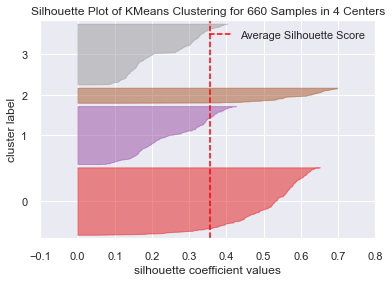

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [506]:
# finding optimal no. of clusters with silhouette coefficients  with k= 4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

<font color = 'green'>
<font size =1 >
# Observations : From the silhouette plot for k = 4, Appears to be almost equally divided. Let's evaluate further k values before determining the optimal cluster number.

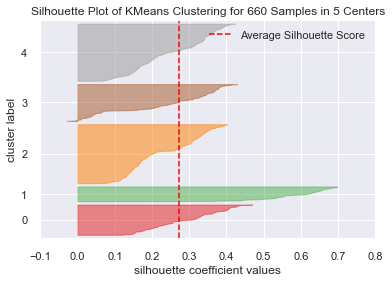

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [507]:
# finding optimal no. of clusters with silhouette coefficients k = 5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

<font color = 'green'>
<font size =1 >
# Observations : From the silhouette plot for k = 5, cluster 3 appears to go into negative coefficients value. Hence this is not an appropriate value.

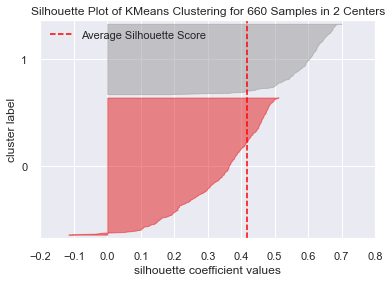

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [508]:
# finding optimal no. of clusters with silhouette coefficients with k= 2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

<font color = 'green'>
<font size =1 >
# Observations : From the silhouette plot for k = 2, too large cluster groups, also has a negative coefficient value.

<font color = 'black'>
<font size =2 >
### Observations : From evaluating all the plots, we can see that a k value of 4 appears to be the most appropriate value . So let's take 4 as the appropriate no. of clusters as the silhouette score is high enough.

<font color=darkorange>
<font size =4.5>
1.7.6  Perform Cluster profiling for K-means clustering

In [509]:
# As we determined that the optimal value of k= 4, we will perform cluster profiling with the same k value.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [510]:
# adding kmeans cluster labels to the original dataframe
card_sc["K_means_segments"] = kmeans.labels_

In [511]:
cluster_profile = card_sc.groupby("K_means_segments").mean()

In [512]:
cluster_profile["count_in_each_segment"] = (
    card_sc.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [513]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377,199
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,31226.315789,5.478947,4.515789,1.010526,1.936842,190


<AxesSubplot:xlabel='K_means_segments'>

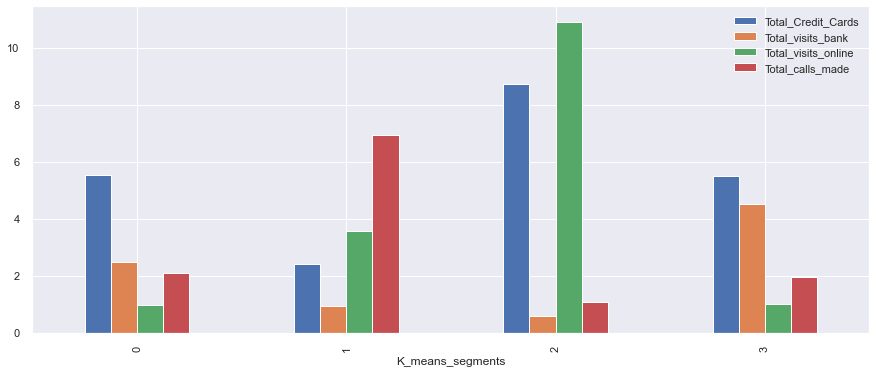

In [514]:
x= card_sc.groupby("K_means_segments").mean()
x.drop(["Avg_Credit_Limit"], axis=1, inplace=True)
x.plot.bar(figsize=(15, 6))

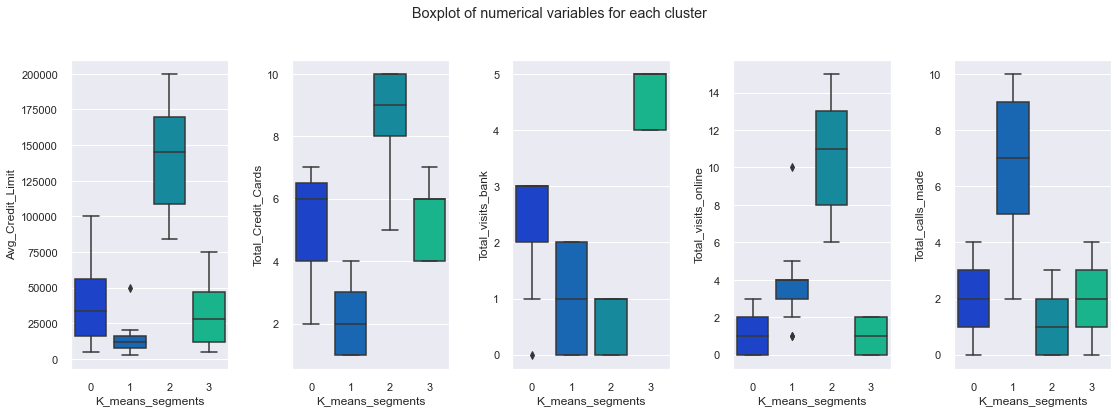

In [515]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=card_sc[num_col[counter]], x=card_sc["K_means_segments"], palette="winter")
    counter = counter + 1

fig.tight_layout(pad=2.0)

<font color = 'green'>

**Insights**
    
- **Cluster 0**: 
    - Low Avg_Credit_Limit
    - Moderate Total_Credit_Cards
    - Total visits to bank in person is  moderate to high
    - Very Low online visits
    - Less calls made to the bank


- **Cluster 1**:
    - Very low average credit limit.
    - Low number of Total_Credit_Cards
    - Total visits to bank in person is moderate
    - Not much online visits
    - Large number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on phone


- **Cluster 2**:
    - Very high average credit limit.
    - Large number of Total_Credit_Cards
    - Total visits to bank in person is very low
    - Very high online visits.
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on online


- **Cluster 3**:
    - Low average credit limit.
    - Moderate to high number of Total_Credit_Cards
    - Total visits to bank in person is very high
    - Very less online visits
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate inperson
    
 **From the above cluster grouping we can three very clear cluster groupings of customers who prefer online, inperson or phone communication with the bank.**



<font color=darkcyan>
<font size =5>
1.8 Applying Hierarchical clustering

In [516]:
# Making a copy of dataset
card_sc1 = card.copy()

In [517]:
# Making a list to separate numeric and categorical columns
num_col = card_sc1.select_dtypes(include=np.number).columns.tolist()

<font color=darkorange>
<font size =4.5>
1.8.1 Scaling the data 

In [518]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = card_sc1[num_col].copy()
subset_scaled1 = scaler.fit_transform(subset)

In [519]:
# Creating a dataframe from the scaled data
subset_scaled_df1 = pd.DataFrame(subset_scaled1, columns=subset.columns)

<font color=darkorange>
<font size =4.5>
1.8.2  Apply hierarchical clustering with different distance metrics and linkage methods.

In [520]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [None, None]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [521]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<font color = 'green'>
<font size =2 >
### Observations : Since highest cophenetic correlation is with euclidean distance we will further explore different linkage methods with Euclidean distance only

<font color=darkorange>
<font size =4.5>
1.8.3  Apply hierarchical clustering with `Euclidean` distance metrics and different linkage methods.

In [522]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [523]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<font color = 'green'>
<font size =2 >
### Observations : We see that the cophenetic correlation is maximum with Euclidean distance and average linkage. Next highest is centroid linkage.

<font color=darkorange>
<font size =4.5>
1.8.4  Plot dendrograms for different linkage methods.

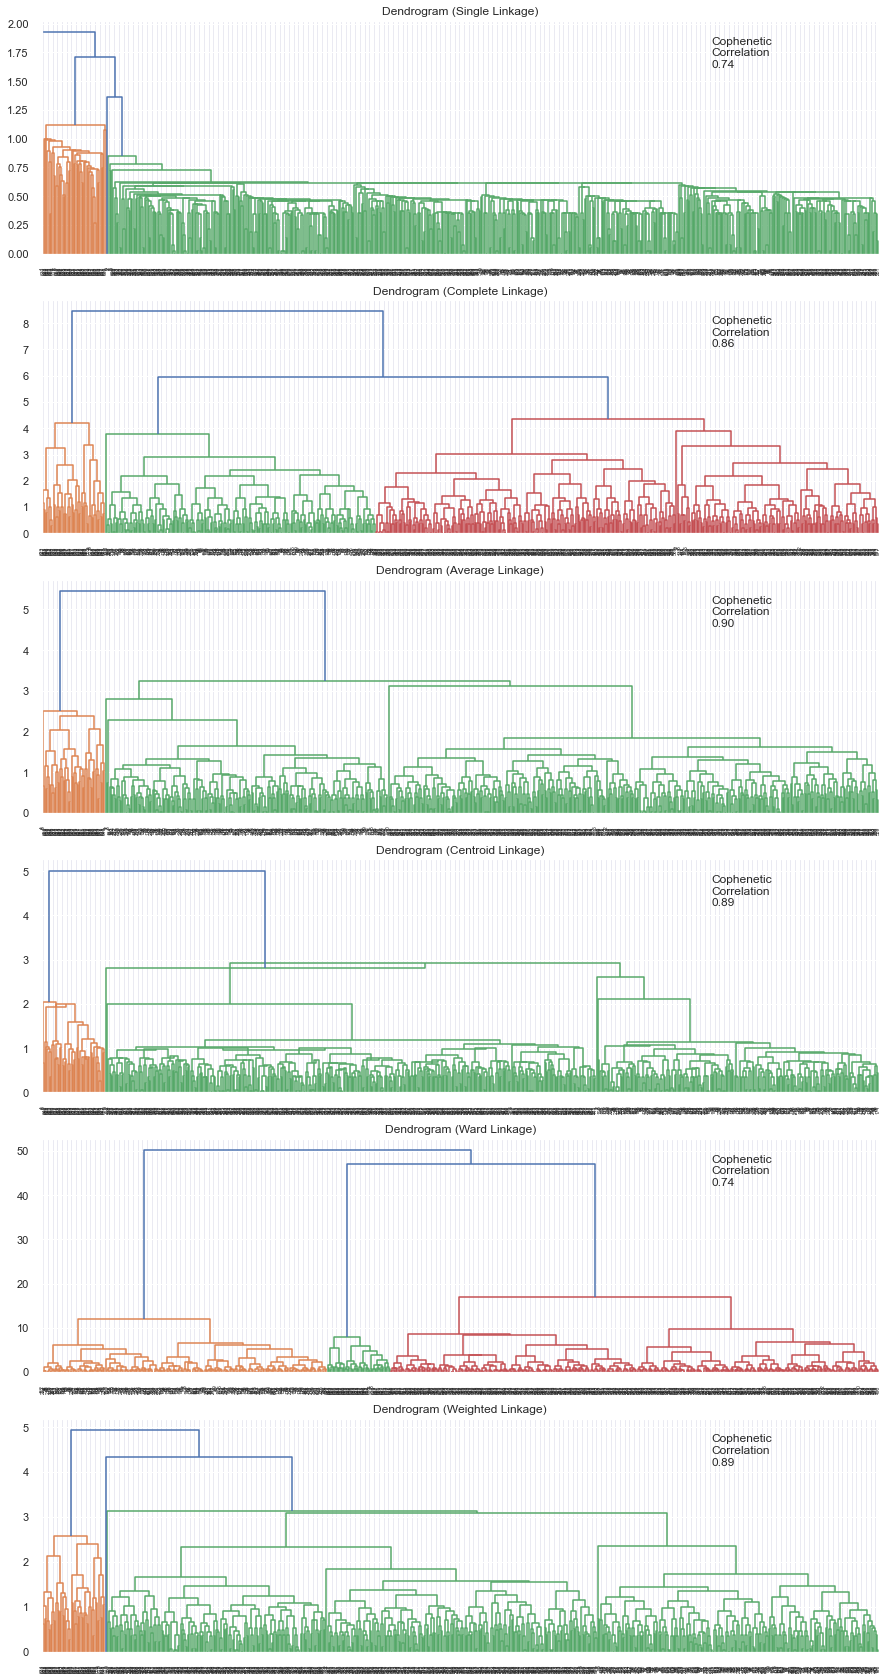

In [524]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

<font color = 'green'>
<font size =2 >
    
**Observations :** 
    
As the dendograms are too clustered and we fail to see any clear distinction about number of clusters, we will be truncating the dendogram for further evaluation.

<font color=darkorange>
<font size =4.5>
1.8.5  Truncated dendrogram plots

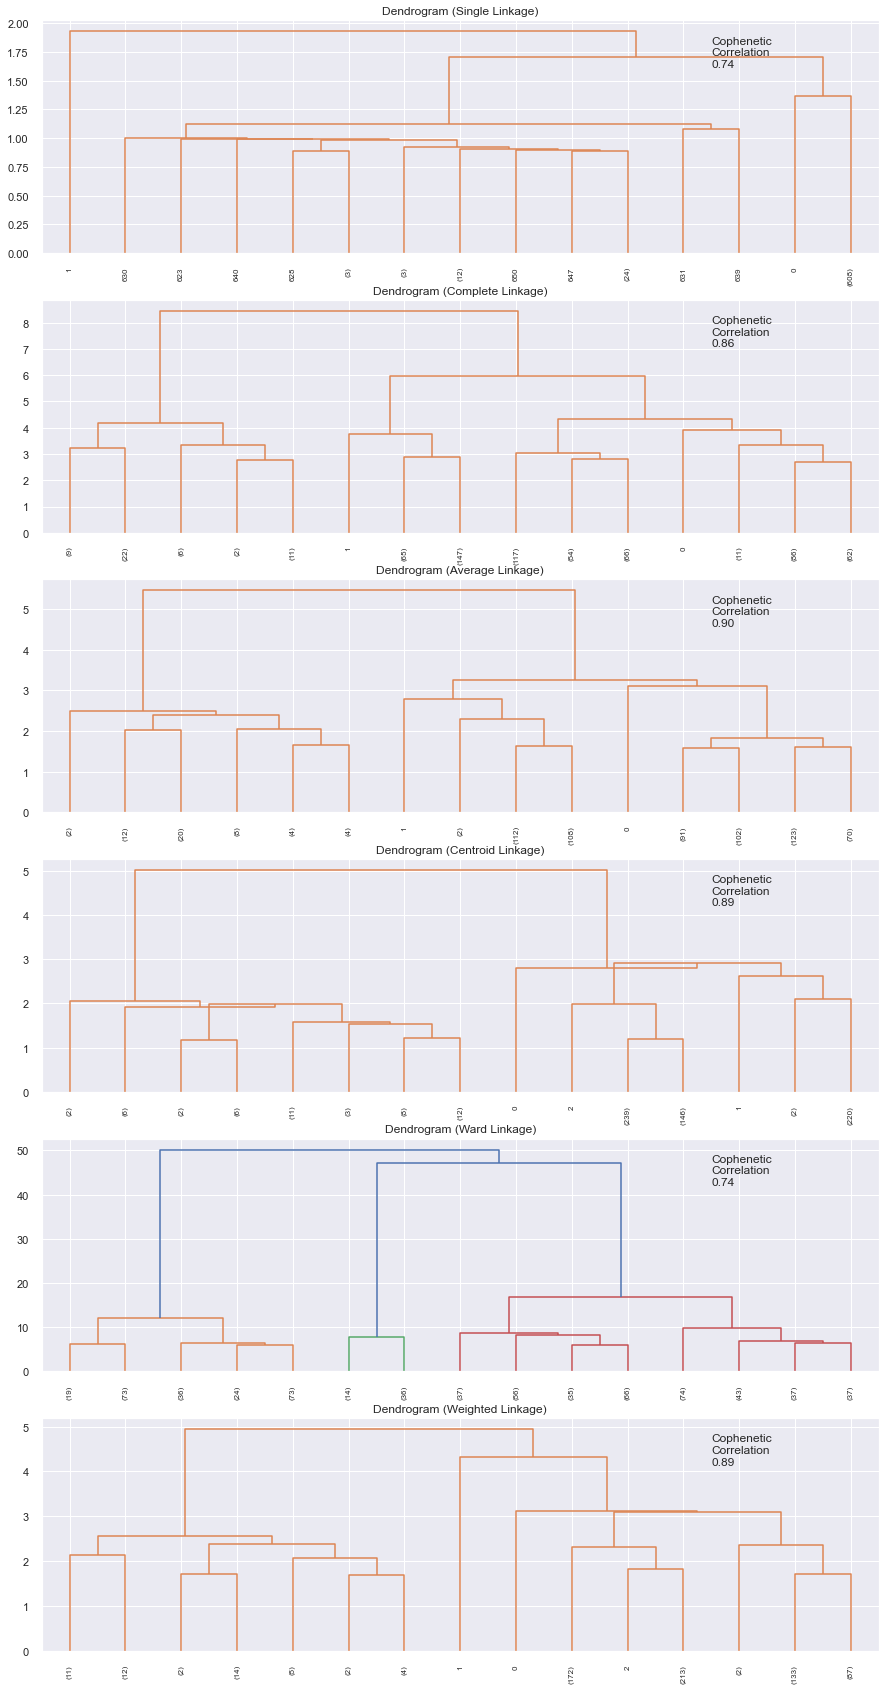

In [525]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i],p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")


    
    
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

<font color = 'green'>
<font size =2 >


**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

<font color=darkorange>
<font size =4.5>
1.8.5  Perform Cluster profiling for Hierarchical clustering

In [526]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [527]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
card_sc1["HC_Clusters"] = HCmodel.labels_

<font color=darkorange>
<font size =4.5>
1.8.5.1 Cluster profiling with euclidean distance metrics and average linkage

In [528]:
cluster_profile = card_sc1.groupby("HC_Clusters").mean()

In [529]:
cluster_profile["count_in_each_segments"] = (
    card_sc1.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [532]:
# let's see the customers in each cluster
for cl in card_sc1["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(card_sc1[card_sc1["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 3, the following customers are present:
[87073]
Categories (1, int64): [87073]

In cluster 0, the following customers are present:
[38414, 58634, 37376, 82490, 44770, ..., 51773, 96163, 61234, 55849, 56156]
Length: 223
Categories (223, int64): [38414, 58634, 37376, 82490, ..., 96163, 61234, 55849, 56156]

In cluster 2, the following customers are present:
[17341, 40496, 54838, 35254, 46635, ..., 90191, 49341, 11562, 16253, 80623]
Length: 384
Categories (384, int64): [17341, 40496, 54838, 35254, ..., 49341, 11562, 16253, 80623]

In cluster 1, the following customers are present:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]



<font color = 'green'>
<font size =2 >

**Observations:**   
1. We see that there are 1 clusters of one customer and other two clusters, customers are divided almost equally with last cluster with significantly less customers . This clustering does not look good as the clusters do not have enough variability.
2. Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

<font color=darkorange>
<font size =4.5>
1.8.5.2 Cluster profiling with euclidean distance metrics and ward linkage

In [533]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(n_clusters=4)

In [534]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
card_sc1["HC_Clusters"] = HCmodel.labels_

In [535]:
cluster_profile = card_sc1.groupby("HC_Clusters").mean()

In [536]:
cluster_profile["count_in_each_segments"] = (
    card_sc1.groupby("HC_Clusters")["Customer Key"].count().values
)

In [537]:
# let's see the customers in each cluster
for cl in card_sc1["HC_Clusters"].unique():
    print(
        "The",
        card_sc1[card_sc1["HC_Clusters"] == cl]["Customer Key"].nunique(),
        "customers in cluster",
        cl,
        "are:",
    )
    print(card_sc1[card_sc1["HC_Clusters"] == cl]["Customer Key"].unique())
    print("-" * 100, "\n")

The 196 customers in cluster 1 are:
[87073, 17341, 40496, 54838, 35254, ..., 85234, 31948, 90191, 11562, 16253]
Length: 196
Categories (196, int64): [87073, 17341, 40496, 54838, ..., 31948, 90191, 11562, 16253]
---------------------------------------------------------------------------------------------------- 

The 223 customers in cluster 0 are:
[38414, 58634, 37376, 82490, 44770, ..., 51773, 96163, 61234, 55849, 56156]
Length: 223
Categories (223, int64): [38414, 58634, 37376, 82490, ..., 96163, 61234, 55849, 56156]
---------------------------------------------------------------------------------------------------- 

The 50 customers in cluster 2 are:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]
---------------------------------------------------------------------------------------------------- 

The 190 customers in cluster 3 are:
[46635, 83125, 15129, 832

<font color = 'green'>
<font size =2 >

Observations:    
1. Now the clusters seem to have more variability.
2. They seem to be more equally distributed.

In [538]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,223
1,37520.408163,5.642857,2.525510,0.974490,2.142857,196
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,29806.282723,5.376963,4.471204,0.994764,1.863874,191


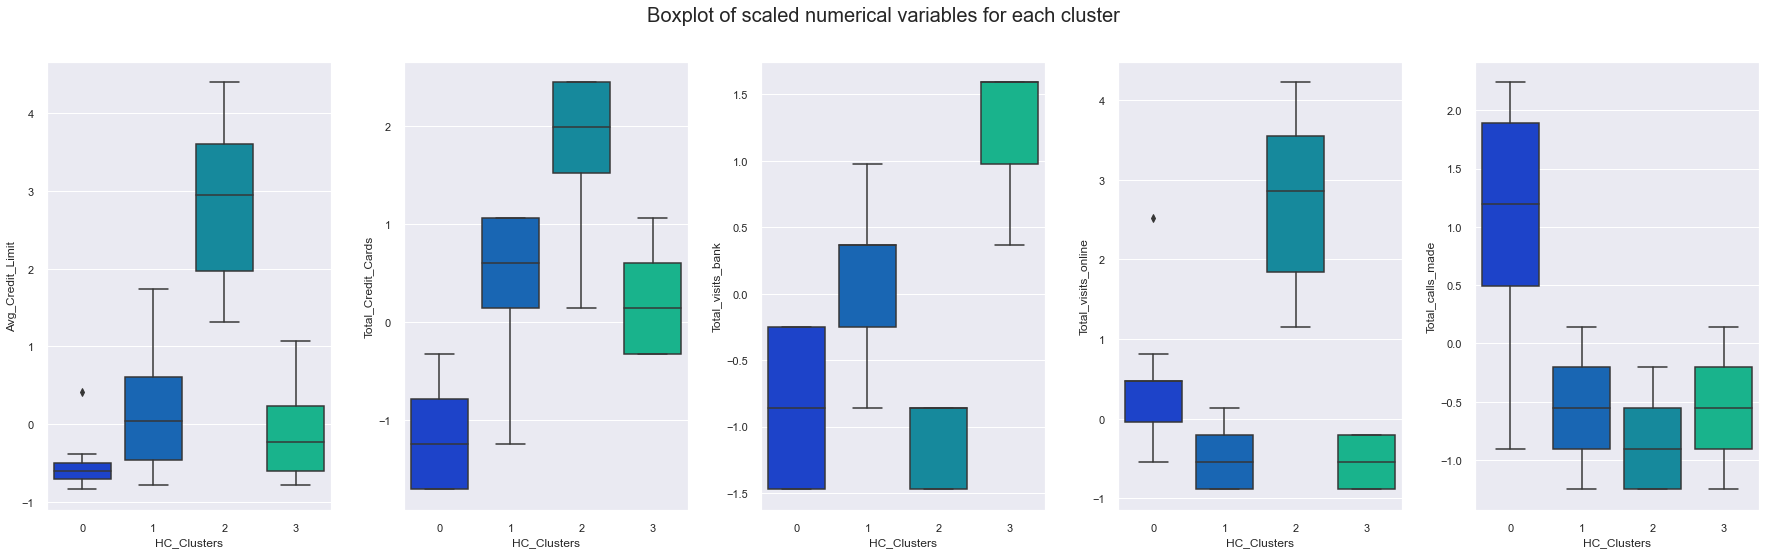

In [539]:
fig, axes = plt.subplots(1, 5, figsize=(25,8))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df1[num_cols[counter]],
        x=subset_scaled_df1["HC_Clusters"], palette = 'winter'
    )
    
   
    counter = counter + 1


fig.tight_layout(pad=2.0)

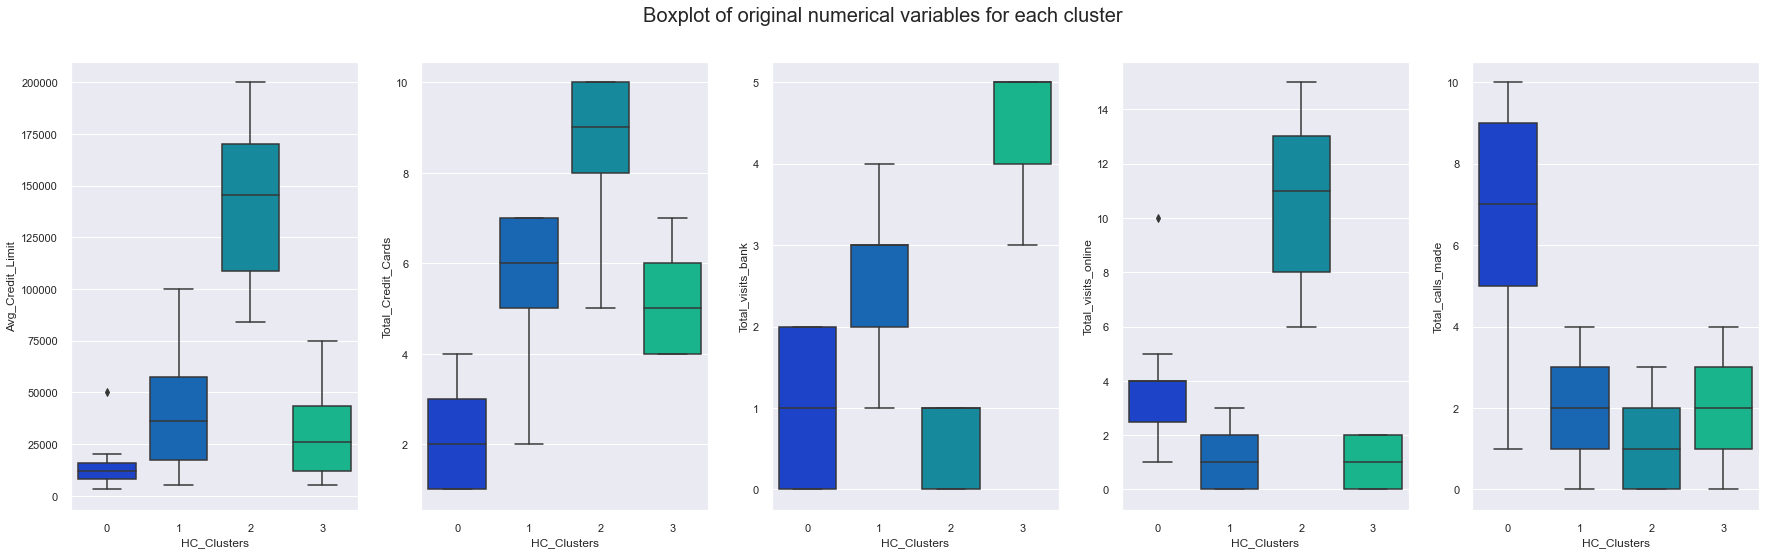

In [540]:
fig, axes = plt.subplots(1, 5, figsize=(25,8))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=card_sc1[num_cols[counter]],
        x=card_sc1["HC_Clusters"], palette = 'winter'
    )
    
   
    counter = counter + 1


fig.tight_layout(pad=2.0)



<font color = 'green'>

**Insights**
    
- **Cluster 0**: 
    - Very Low Avg_Credit_Limit
    - Low Total_Credit_Cards
    - Total visits to bank in person is  moderate 
    - Moderate online visits
    - Very high calls made to the bank
    - This can be categorized as the group who prefers to communicate on phone

- **Cluster 2**:
    - Very high average credit limit.
    - Large number of Total_Credit_Cards
    - Total visits to bank in person is very low
    - Very high online visits.
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on online


- **Cluster 3**:
    - Low average credit limit.
    - Moderate to high number of Total_Credit_Cards
    - Total visits to bank in person is very high
    - Very less online visits
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate inperson
    
 **From the above cluster grouping we can three very clear cluster groupings of customers who prefer online, inperson or phone communication with the bank.**


<font color=darkcyan>
<font size =5>
1.9 PCA for Dimensionality Reduction

In [541]:
# Making a copy of dataset
card_pca = card.copy()

In [542]:
# Making a list to separate numeric and categorical columns
num_col = card_pca.select_dtypes(include=np.number).columns.tolist()

<font color=darkorange>
<font size =4.5>
1.9.1 Scaling the data 

In [543]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = card_pca[num_col].copy()
subset_scaled2 = scaler.fit_transform(subset)

In [544]:
# Creating a dataframe from the scaled data
subset_scaled_df2 = pd.DataFrame(subset_scaled2, columns=subset.columns)

<font color = 'green'>
<font size =2 >


Let's use PCA to reduce the dimensions so that 90% of the variance in the data is explained.


<font color=darkorange>
<font size =4.5>
1.9.2 Applying PCA

In [545]:
pca = PCA()
pca.fit(subset_scaled_df2)

PCA()


<font color = 'green'>
<font size =2 >

Let's check the variance explained by individual components.

In [546]:
pca.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

Text(0, 0.5, 'Cumulative Explained Variance')

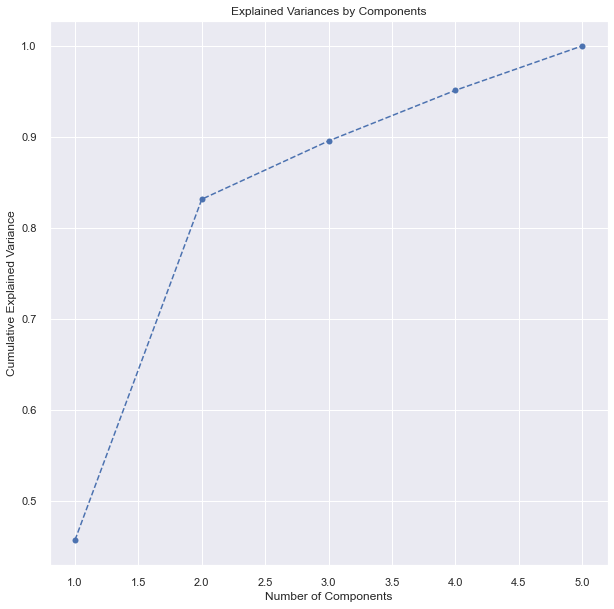

In [547]:
# visualizing the variance explained by individual principal components
plt.figure(figsize=(10, 10))
plt.plot(
    range(1, 6), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

<font color = 'green'>
<font size =2 >

**Observations:**  

For 90% variance explained, the number of components looks to be 3 or 4

In [548]:
pca = PCA(
    0.9, svd_solver="full"
)  # svd_solver=full helps in faster convergence in case of very large data set
pca.fit(subset_scaled_df2)

PCA(n_components=0.9, svd_solver='full')

In [549]:
# checking the variance explained by individual components.
pca.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 ])

Text(0, 0.5, 'Cumulative Explained Variance')

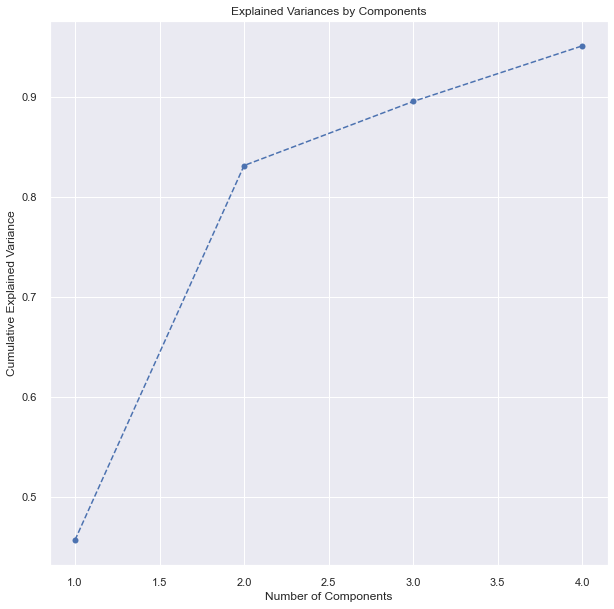

In [550]:
plt.figure(figsize=(10, 10))
plt.plot(
    range(1, 5), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

<font color = 'green'>
<font size =2 >

**Observations:**  

Almost 95% variance is  explained by the number of components 4

In [551]:
subset_pca = pca.transform(subset_scaled_df2)
subset_pca_df = pd.DataFrame(subset_pca)

<font color=darkorange>
<font size =4.5>
1.9.2 Hierarchical Clustering on lower-dimensional data

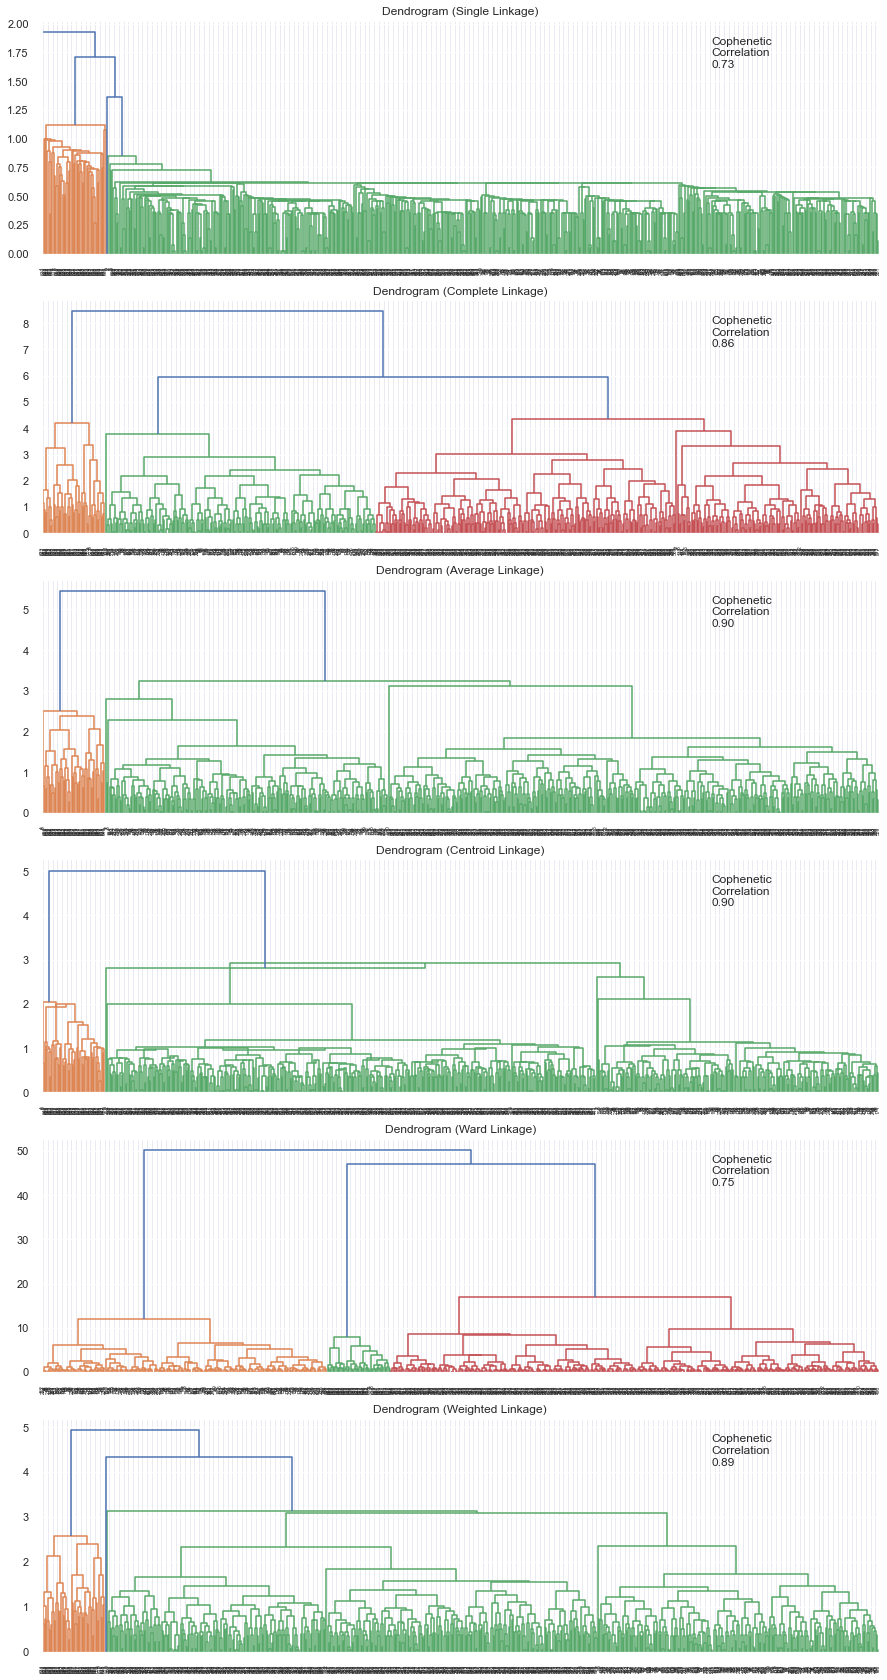

In [552]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_pca_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

<font color=darkorange>
<font size =4.5>
1.9.3 Truncated Hierarchical Clustering on lower-dimensional data

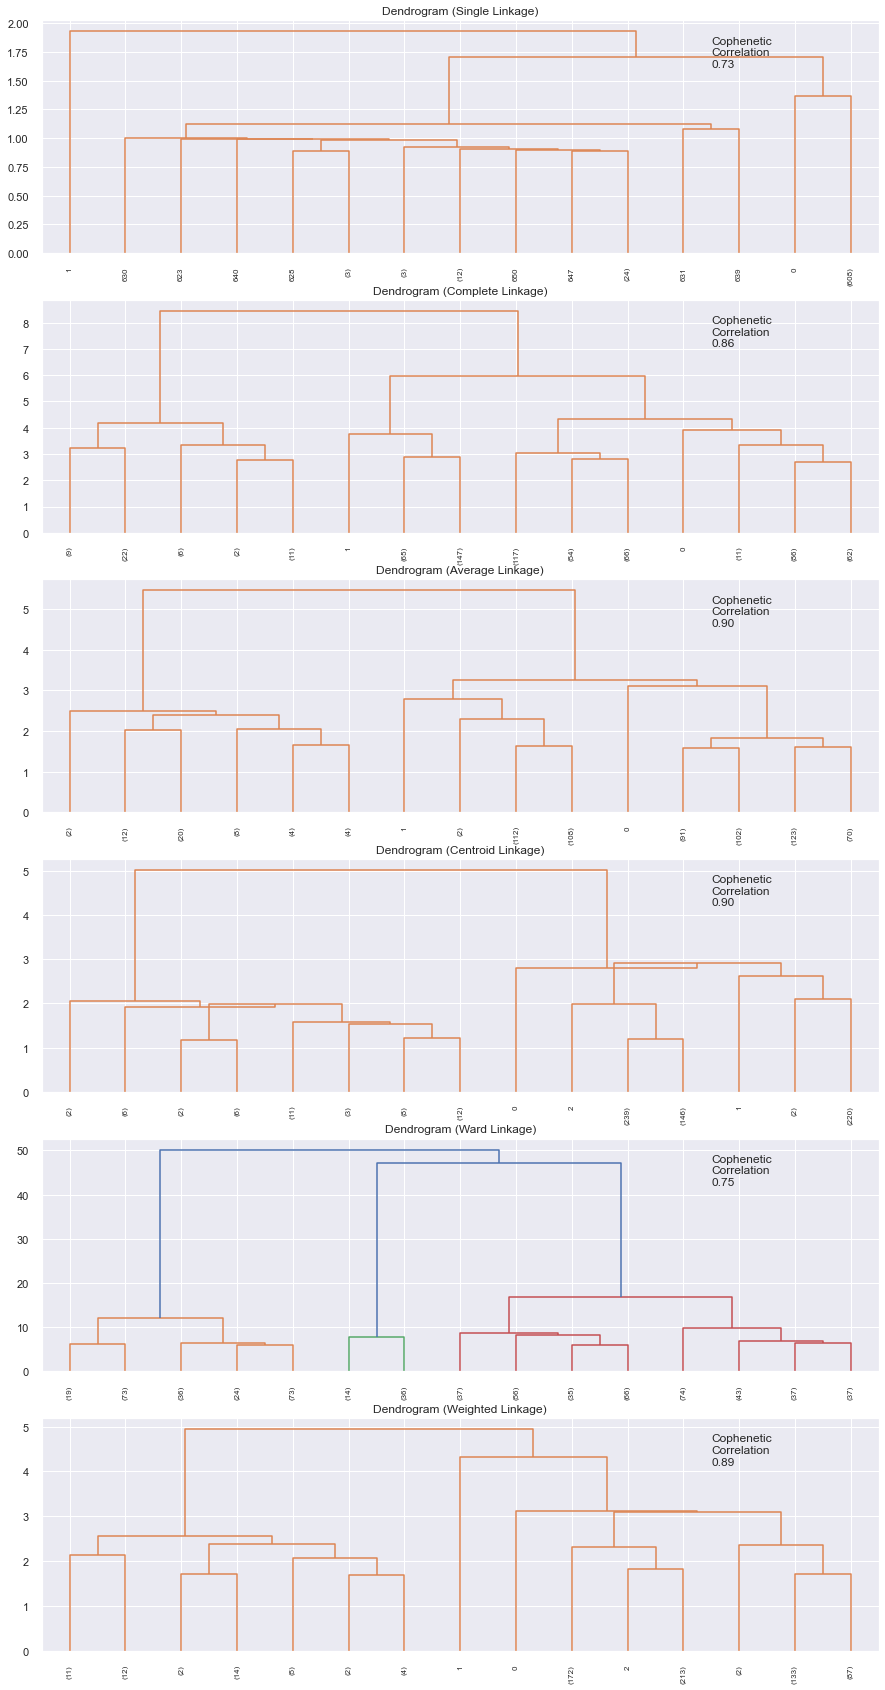

In [553]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i],p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_pca_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )


<font color = 'green'>
<font size =2 >

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods, but we will proceed with Ward linkage as it has more distinct and separated clusters.
- 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

<font color=darkorange>
<font size =4.5>
1.9.3 Cluster profiling on lower-dimensional data

In [554]:
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
hc_labels = hc.fit_predict(subset_pca)

In [555]:
# adding hierarchical cluster labels to the original dataframe
df2 = card_pca
df2["PCA_HC_Clusters"] = hc_labels

In [556]:
cluster_profile2 = df2.groupby("PCA_HC_Clusters").mean()
cluster_profile2["count_in_each_segments"] = (
    df2.groupby("PCA_HC_Clusters")["Total_Credit_Cards"].count().values
)

In [557]:
# let's see the customers in each cluster
for cl in df2["PCA_HC_Clusters"].unique():
    print(
        "The",
        df2[df2["PCA_HC_Clusters"] == cl]["Customer Key"].nunique(),
        "customers in cluster",
        cl,
        "are:",
    )
    print(df2[df2["PCA_HC_Clusters"] == cl]["Customer Key"].unique())
    print("-" * 100, "\n")

The 211 customers in cluster 1 are:
[87073, 17341, 54838, 35254, 97825, ..., 85234, 31948, 90191, 11562, 16253]
Length: 211
Categories (211, int64): [87073, 17341, 54838, 35254, ..., 31948, 90191, 11562, 16253]
---------------------------------------------------------------------------------------------------- 

The 224 customers in cluster 0 are:
[38414, 40496, 58634, 37376, 82490, ..., 51773, 96163, 61234, 55849, 56156]
Length: 224
Categories (224, int64): [38414, 40496, 58634, 37376, ..., 96163, 61234, 55849, 56156]
---------------------------------------------------------------------------------------------------- 

The 50 customers in cluster 2 are:
[47437, 48370, 94391, 50598, 40019, ..., 51108, 60732, 53834, 80655, 80150]
Length: 50
Categories (50, int64): [47437, 48370, 94391, 50598, ..., 60732, 53834, 80655, 80150]
---------------------------------------------------------------------------------------------------- 

The 174 customers in cluster 3 are:
[46635, 83125, 15129, 832

In [558]:
# let's display cluster profile
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
PCA_HC_Clusters,,,,,,
0,12276.785714,2.415179,0.928571,3.549107,6.870536,224
1,35165.876777,5.601896,2.606635,0.985782,2.161137,211
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,31982.857143,5.405714,4.560000,0.982857,1.805714,175


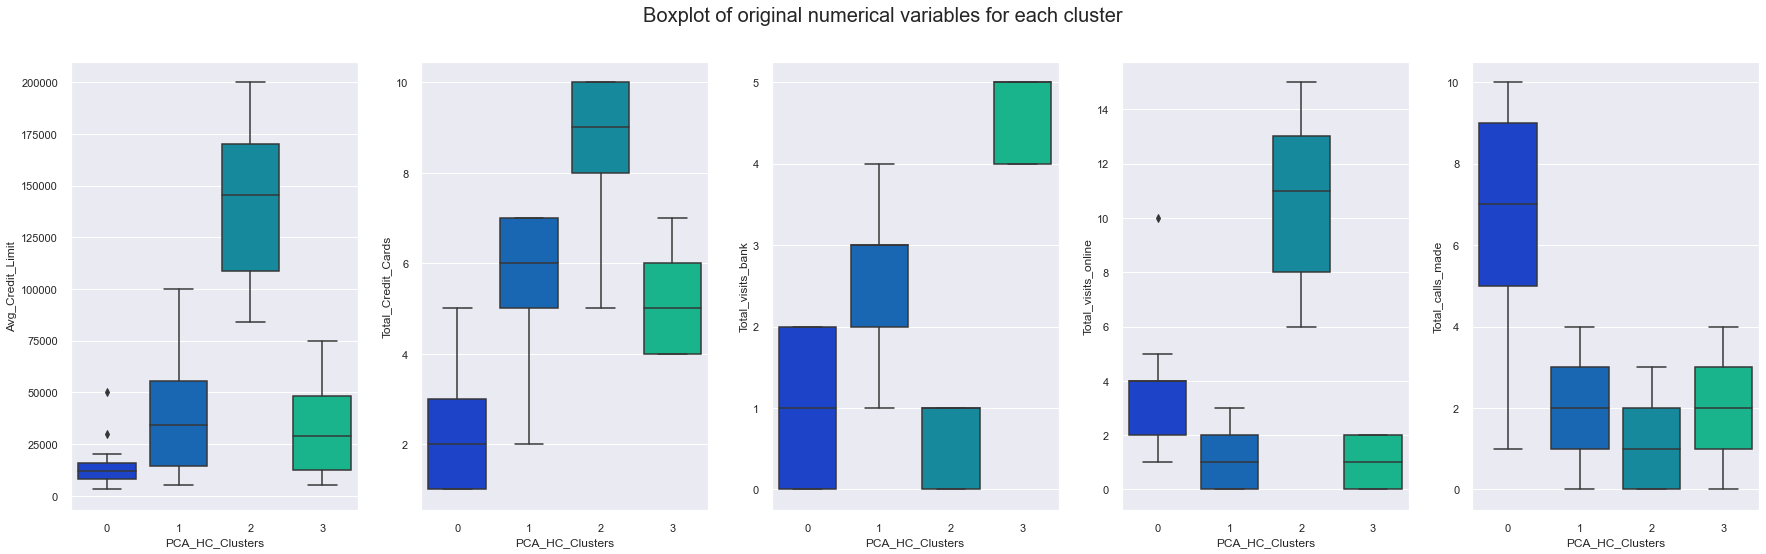

In [561]:
fig, axes = plt.subplots(1, 5, figsize=(25,8))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=df2[num_cols[counter]],
        x=df2["PCA_HC_Clusters"],
        palette ='winter'
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

<font color=darkcyan>
<font size =5>
1.10 Compare K-means and Hierarchical clustering

<font color=darkorange>
<font size =4.5>
1.10.1 Compare clusters and cluster profiling

<font color=green>
<font size =1>

    ** Number of clusters considered in both K-means and heirarchical clustering was deduced to be 4 by silhouette score and dendrograms respectively. **
    
Below we can see the differences in both clustering algorithms.


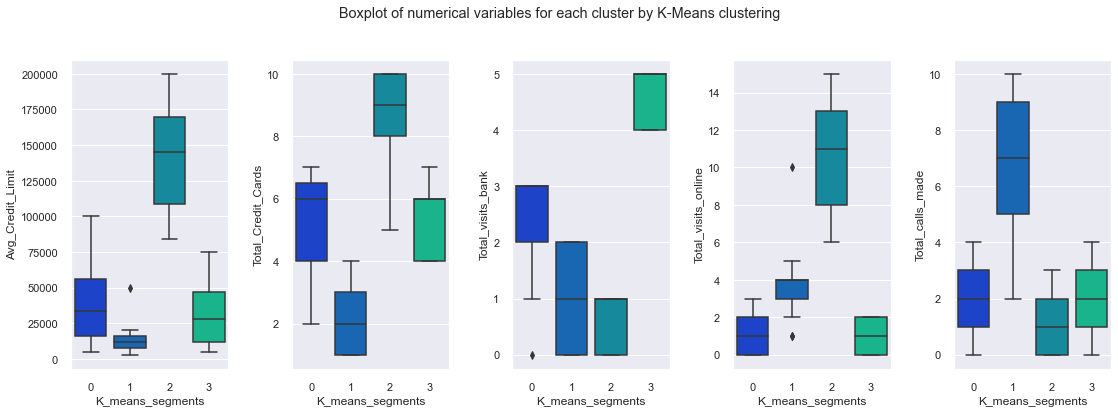

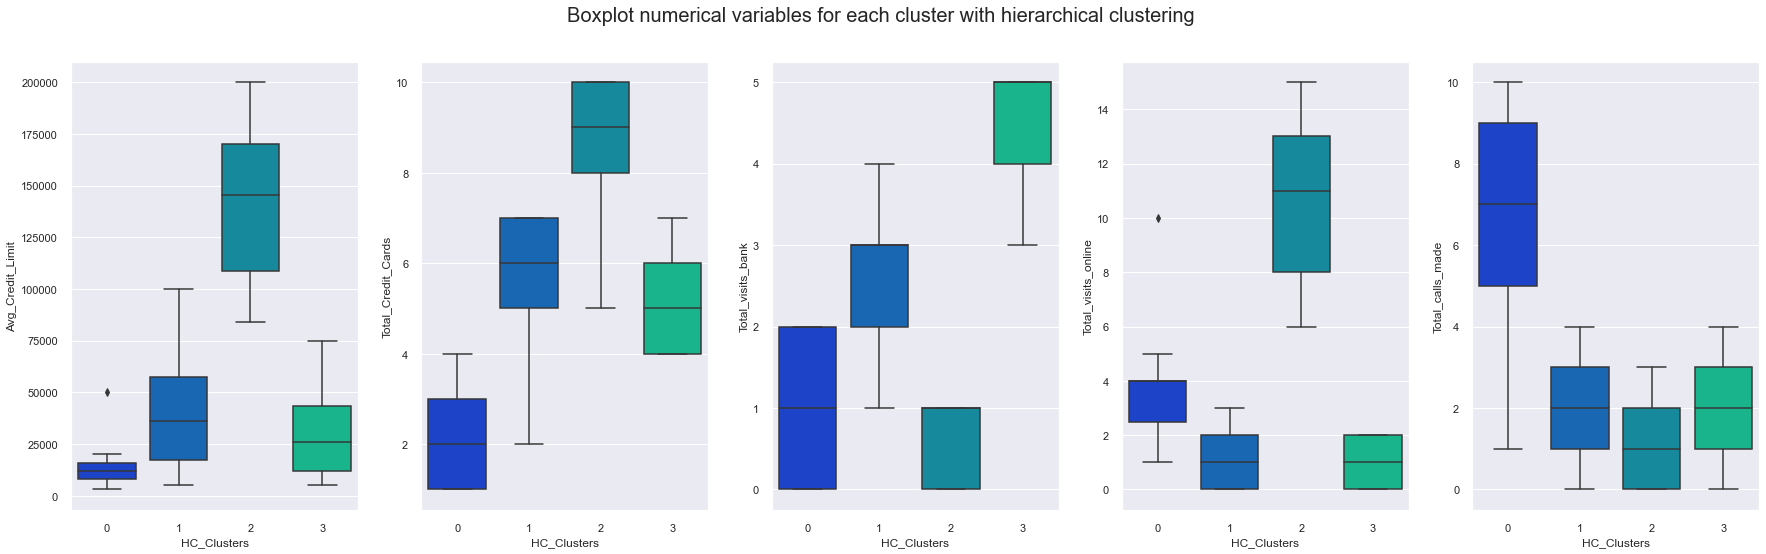

In [562]:
# Plotting Boxplot of numerical variables for each cluster by K-Means clustering
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster by K-Means clustering")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=card_sc[num_col[counter]], x=card_sc["K_means_segments"], palette="winter")
    counter = counter + 1
fig.tight_layout(pad=2.0)

#Plotting Boxplot numerical variables for each cluster with hierarchical clustering
fig, axes = plt.subplots(1, 5, figsize=(25,8))
fig.suptitle("Boxplot numerical variables for each cluster with hierarchical clustering ", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=card_sc1[num_cols[counter]],x=card_sc1["HC_Clusters"], palette = 'winter')
    counter = counter + 1
fig.tight_layout(pad=2.0)

<font color=darkorange>
<font size =4.5>
1.10.2 Insights about different clusters.

<font color = 'green'>

**Insights for k-means clustering**

- **Cluster 1**:
    - Very low average credit limit.
    - Low number of Total_Credit_Cards
    - Total visits to bank in person is moderate
    - Not much online visits
    - Large number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on phone


- **Cluster 2**:
    - Very high average credit limit.
    - Large number of Total_Credit_Cards
    - Total visits to bank in person is very low
    - Very high online visits.
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on online


- **Cluster 3**:
    - Low average credit limit.
    - Moderate to high number of Total_Credit_Cards
    - Total visits to bank in person is very high
    - Very less online visits
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate inperson


<font color = 'green'>

**Insights for Hierarchical clustering**
    
- **Cluster 0**: 
    - Very Low Avg_Credit_Limit
    - Low Total_Credit_Cards
    - Total visits to bank in person is  moderate 
    - Moderate online visits
    - Very high calls made to the bank
    - This can be categorized as the group who prefers to communicate on phone

- **Cluster 2**:
    - Very high average credit limit.
    - Large number of Total_Credit_Cards
    - Total visits to bank in person is very low
    - Very high online visits.
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate on online


- **Cluster 3**:
    - Low average credit limit.
    - Moderate to high number of Total_Credit_Cards
    - Total visits to bank in person is very high
    - Very less online visits
    - Low number of calls made to the bank
    - This can be categorized as the group who prefers to communicate inperson
    
 **From the above cluster groupings in both clustering algorithms we can see three very clear cluster groupings of customers who prefer online, inperson or phone communication with the bank.**


<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
**Key Observations**
       
1) `Customer Key`: is a unique customer identification number and  from `Customer Key` column about 5 customer keys are repeated twice. The duplicate records for Customer Key don't match.We can assume that a record was added to the database instead of updating an existing record. Also these could be joint accounts where the Customer Key is same but with different Sl_No.
    
2) `Avg_Credit_Limit` : Data in `Avg_Credit_Limit` appears to be skewed.`Avg_Credit_Limit` is too varied and can be binned for further analysis.Max customers have less than 25k average credit limit. Lot of outliers. But outliers cannot be treated as they contain valuable data of high average credit limit customers.
    
3) `Total_Credit_Cards` : Customers have a minimum of 1 to max of 10 credit cards.Most customers have a total 4,6 or 7 credit cards. Maximum customers have 4 credit cards. Almost 65 % of customers have 4 to 7 credit cards. Less than 5 % of customers have 8 or more credit cards.

4) `Total_visits_bank`: Customer visits to bank is in range of 0 to 5. Most customers visit the bank 2 times yearly. Almost 15% of customers never visit the bank. More than 50%v of customers visit bank atleasr 1 to 3 times.

5) `Total_visits_online`:  Right skewed data. Customer visits online is in range 0 to 15. Most customers online visit on bank sites is about 2 times yearly. Almost 70% of customers visit bank online atleast 1 to 5 times. @0% of customers never visit banks online.

6) `Total_calls_made`: Total customer calls made to the bank are in range 0 to 10. Most customers have made 4 or less than 4 calls yearly. Almost 15 % customers never call. Around 50 % of customers call bank atleast 1 to 4 times in a year.
    
Customer interactions with the bank via bank visit ranges from 1 to 5, online is 1 to 15 times, calls made are between 1 to 10.
    

**Key Variables correlating** 
 
1) Avg_Credit_Limit increases with increase in Total_Credit_Cards in customers.
2) Customers with 4-7 credit cards visit banks more as compared to those with less than 4 or more than 7 cards.
3) Customers with more than 8 credit cards visit online bank sites more than the rest.
4) Customers with 1 to 3 credit cards mode of contact with bank is preferrably calls.
5) If we divide customers into three groups customers preferring online, call or inperson communications with bank, then on the basis of customer total credit cards, people with low total cards, i.e., less than 3 prefer more of phone communication, those with moderate number of cards, i.e. 4-7 prefer visiting the bank in person and those with high number of cards , i.e, more than 8 prefer online communication.
6) Zero or lower calls made corresponds to more credit cards, more visits online,less visits online and higher average credit limit.
7) Customer who make more calls visit banks less, but have significantly hihger online presence.
8) But they have less credit cafrds in total and as a result lower average credit limit.
9) These customers can be targeted by marketing team to increase customer base.
10) Customers with zero or lower average credit limit tend to do less online banking according to our data.
11) Also the customers with low online presence tend to visit bank inperson more, as seen by our graphs.
12) Also we can clearly see that customers with more credit cards visit online sites more as compared to others.
13) Customers with zero or lower visit in bank have moderate average credit limit, but high online presence and higher calls.
14) Also these customers have less credit cards as compared to those with higher bank visits. This shows that in person banking increases the chance of more marketing , therby increasing credit card customer base.
 
 

### <a id='link1'>Key Takeaways for Business</a>

<font color = 'black'>

Based on our clustering algorithms three main groups of customers were determined.
    
**1) Customer cluster 1: Customers prefering phone communication**
    
    - Very low average credit limit.
    - Low number of Total_Credit_Cards
    - Total visits to bank in person is moderate
    - Not much online visits
    - Large number of calls made to the bank
    
 This group as we can see has low credit card business. Marketing to this group of customers needs to be improved more for increasing business.
    
**2) Customer cluster 2: Customers prefering online communication**
    
    - Very high average credit limit.
    - Large number of Total_Credit_Cards
    - Total visits to bank in person is very low
    - Very high online visits.
    - Low number of calls made to the bank
    
 This group as we can see has high credit card business. 
    
**3) Customer cluster 3: Customers prefering inperson communication**
    
    - Low average credit limit.
    - Moderate to high number of Total_Credit_Cards
    - Total visits to bank in person is very high
    - Very less online visits
    - Low number of calls made to the bank
    
 This group as we can see has moderate credit card business. Marketing needs to be improved to this group of customers for increasing business.
  

### <a id='link1'>Insights and Recommendations to Business</a>

<font color = 'black'>

1) Marketing needs to be improved to phone and inperson customer clusters. As we can see their business is low as compared to online customer cluster.
    
2) We can assume here that most online customers are more satisfied with bank services hence marketing team should encourage more customers to move to online services. Since these services can be 24/7 the bank can provide quick customer issue resolution via online services.
    
3) Bank needs to improve on issue resoution via calls on phone as well, so that customers are as satisfied with phone services as they are with online services.
    
4) Bank should improve customer satisfaction, by improving customer services provided inperson in bank by making things fast, smooth and easy for customers visiting bank.
  